In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

In [2]:
sigmatrue= 1.4
rmserrtrue = 0.2
Np = 100

In [3]:
def model(sigmamod):
    return np.exp(-xar**2/(2*sigmamod**2))

xar = np.linspace(-7,7,Np)
data = model(sigmatrue)+np.random.normal(0,rmserrtrue,Np) ## model with errors

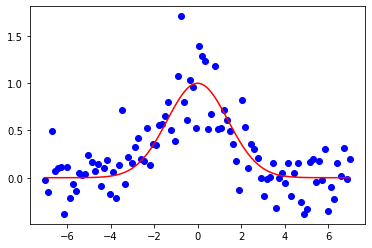

In [4]:
plt.plot(xar,data,'bo')
plt.plot(xar,model(sigmatrue),'r-')
    

In [5]:
def logL (sigma,rms):
    return (-(model(sigma)-data)**2/(2*rms**2) - 0.5*np.log(rms**2)).sum()

In [6]:
sigmar = np.linspace (0,2*sigmatrue,150)
rmsar = np.linspace (rmserrtrue/10,2*rmserrtrue,200)
logLar = np.array([[logL(sigma,rms) for sigma in sigmar] for rms in rmsar])

/home/anze/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0, 0.5, 'sigmaerr')

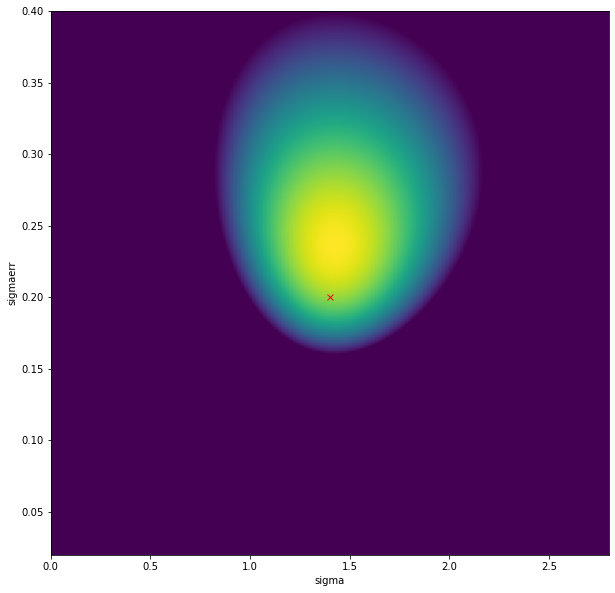

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(logLar,vmin = logLar.max()-20,vmax=logLar.max(), origin ='lower',
           extent = (sigmar[0],sigmar[-1],rmsar[0],rmsar[-1]),aspect='auto')
plt.plot(sigmatrue,rmserrtrue,'rx')
plt.xlabel('sigma')
plt.ylabel('sigmaerr')

In [8]:
### best fit
sigmabest,rmserrbest=fmin(lambda x:-logL(*x),[1,0.1])
print (sigmabest,rmserrbest)

Optimization terminated successfully.
         Current function value: -94.208919
         Iterations: 33
         Function evaluations: 65
1.42499467063462 0.23644657089491322


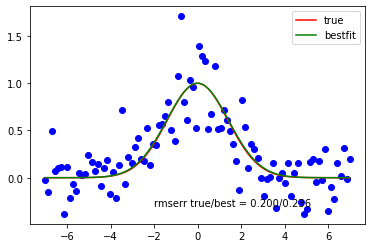

In [10]:
plt.plot(xar,data,'bo')
plt.plot(xar,model(sigmatrue),'r-',label='true')
plt.plot(xar,model(sigmabest),'g-',label='bestfit')
plt.text(-2,-0.3,'rmserr true/best = %3.3f/%3.3f'%(rmserrtrue,rmserrbest))
plt.legend()